# Cue congruency over blocks? 

Do people learn to rely on the cue congruency more or less over blocks?

In [1]:
import os, glob, sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#easier df inspection
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)

In [2]:
os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Data\\Exp1_auditory\\')
df_aud = pd.read_csv('exp1_prevMotor_prevEvidence.csv')

df_aud['cue_congruent'] = df_aud['response'] == df_aud['cue']
df_aud['cue_congruent'] = df_aud['cue_congruent'].replace({True: 1.0, False: 0.0})

In [3]:
blocks = list(df_aud['block'].unique())
subjects_aud = list(df_aud['sbj_id'].unique())

congr = pd.DataFrame(columns = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])

for sbj in subjects_aud:
    df_sbj = df_aud[df_aud['sbj_id']==sbj]
    for block in blocks: 
        df_block = df_sbj[df_sbj['block']==block]
        
        cue_cong = df_block['cue_congruent'].sum() / df_block.shape[0] *100
        
        congr.at[sbj, block] = cue_cong

In [4]:
means = dict()
for block in blocks: 
    means[block] = congr[block].mean()

In [5]:
means

{1.0: 66.20222180380337,
 2.0: 66.74041297935102,
 3.0: 66.81415929203541,
 4.0: 66.7957227138643,
 5.0: 67.40412979351032,
 6.0: 67.95722713864306,
 7.0: 68.2890855457227,
 8.0: 67.46734091866837}

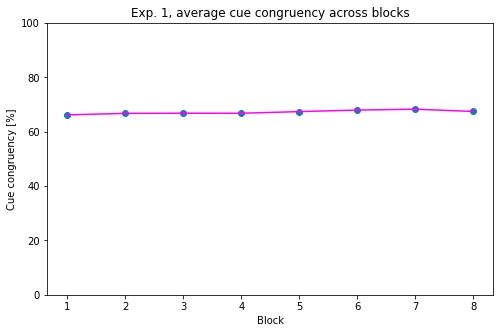

In [6]:
plt.figure(figsize=(8,5))
plt.title('Exp. 1, average cue congruency across blocks')
plt.ylim(0,100)
plt.xlabel('Block')
plt.ylabel('Cue congruency [%]')
plt.plot(means.keys(),means.values(), color='magenta')
plt.scatter(means.keys(), means.values())

In [7]:
# visual data
os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Data\\Exp2_visual\\')
df_vis = pd.read_csv('exp2_prevMotor_prevDiff.csv')

df_vis['cue_congruent'] = df_vis['response'] == df_vis['cue']
df_vis['cue_congruent'] = df_vis['cue_congruent'].replace({True: 1.0, False: 0.0})

In [8]:
blocks = list(df_vis['Block'].unique())
subjects_vis = list(df_vis['sbj_id'].unique())

congr = pd.DataFrame(columns = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])

for sbj in subjects_vis:
    df_sbj = df_vis[df_vis['sbj_id']==sbj]
    for block in blocks: 
        df_block = df_sbj[df_sbj['Block']==block]
        
        cue_cong = df_block['cue_congruent'].sum() / df_block.shape[0] *100
        
        congr.at[sbj, block] = cue_cong
        
means = dict()
for block in blocks: 
    means[block] = congr[block].mean()
    
removed_value = means.pop(0)

<ipython-input-8-696ccfa12fac>:11: RuntimeWarning: invalid value encountered in double_scalars
  cue_cong = df_block['cue_congruent'].sum() / df_block.shape[0] *100
<ipython-input-8-696ccfa12fac>:11: RuntimeWarning: invalid value encountered in double_scalars
  cue_cong = df_block['cue_congruent'].sum() / df_block.shape[0] *100
<ipython-input-8-696ccfa12fac>:11: RuntimeWarning: invalid value encountered in double_scalars
  cue_cong = df_block['cue_congruent'].sum() / df_block.shape[0] *100
<ipython-input-8-696ccfa12fac>:11: RuntimeWarning: invalid value encountered in double_scalars
  cue_cong = df_block['cue_congruent'].sum() / df_block.shape[0] *100
<ipython-input-8-696ccfa12fac>:11: RuntimeWarning: invalid value encountered in double_scalars
  cue_cong = df_block['cue_congruent'].sum() / df_block.shape[0] *100
<ipython-input-8-696ccfa12fac>:11: RuntimeWarning: invalid value encountered in double_scalars
  cue_cong = df_block['cue_congruent'].sum() / df_block.shape[0] *100
<ipython-i

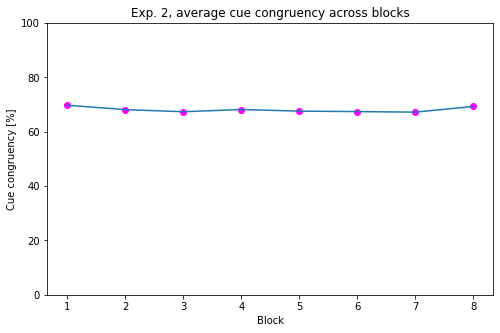

In [9]:
plt.figure(figsize=(8,5))
plt.title('Exp. 2, average cue congruency across blocks')
plt.ylim(0,100)
plt.xlabel('Block')
plt.ylabel('Cue congruency [%]')
plt.plot(means.keys(),means.values())
plt.scatter(means.keys(), means.values(), color='magenta')

In [10]:
means

{1: 69.74145398096184,
 2: 68.13284524940796,
 3: 67.34990365367246,
 4: 68.17114139786415,
 5: 67.57922732362823,
 6: 67.4040256123123,
 7: 67.20452028475005,
 8: 69.28166276004536}

# Cue congruency index

Mean CCI:  32.15879370690912
Min CCI:  17.853832442067727
Max CCI:  62.98359640978025


Text(0.5, 1.0, 'Experiment 1')

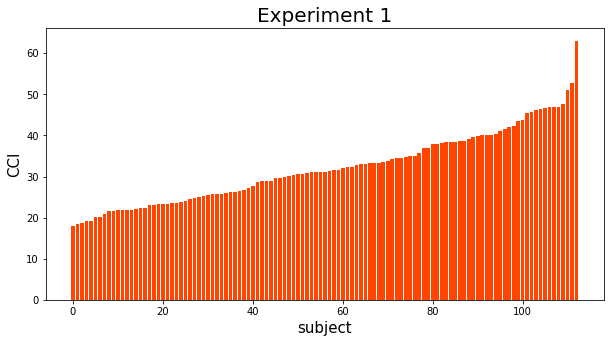

In [11]:
# Experiment 1
df_aud['correct'] = df_aud['correct'].replace({True:1.0, False:0.0})

cuecon_sbj = pd.DataFrame(columns=['sbj_id', 'cci'])

def compute_cci(df):
    
    df_cc = df[df['cue_congruent']==1.0]
    df_ci = df[df['cue_congruent']==0.0]
    
    perc_corr_cc = df_cc['correct'].sum() / df_cc['correct'].shape[0] * 100
    perc_corr_ci = df_ci['correct'].sum() / df_ci['correct'].shape[0] * 100
    
    cci = perc_corr_cc - perc_corr_ci
    
    return cci

for sbj in subjects_aud: 
    
    df_sbj = df_aud[df_aud['sbj_id'] == sbj]
    
    cci_aud = compute_cci(df_sbj)
    
    case = pd.DataFrame({'sbj_id': [sbj], 'cci': [cci_aud]})
    cuecon_sbj = pd.concat([cuecon_sbj, case])

cci_sorted = list(cuecon_sbj['cci'].sort_values())

print('Mean CCI: ', cuecon_sbj['cci'].mean())
print('Min CCI: ', min(cci_sorted))
print('Max CCI: ', max(cci_sorted))


plt.figure(figsize=(10,5))

for index, value in enumerate(cci_sorted): 
    plt.bar(index, value, color='orangered')
plt.xlabel('subject',fontsize=15)
plt.xticks(None)
plt.ylabel('CCI',fontsize=15)
plt.title('Experiment 1',fontsize=20)

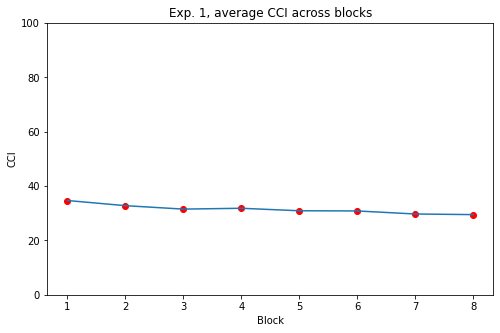

In [12]:
# block wise CCI Exp 1. 
blocks = list(df_aud['block'].unique())
congr = pd.DataFrame(columns = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])

for sbj in subjects_aud: 
    
    df_sbj = df_aud[df_aud['sbj_id']==sbj]
    
    for block in blocks: 
        df_block = df_sbj[df_sbj['block']==block]
        
        cci_block = compute_cci(df_block)
        
        congr.at[sbj, block] = cci_block


means = dict()
for block in blocks: 
    means[block] = congr[block].mean()
    
    
plt.figure(figsize=(8,5))
plt.title('Exp. 1, average CCI across blocks')
plt.ylim(0,100)
plt.xlabel('Block')
plt.ylabel('CCI')
plt.plot(means.keys(),means.values())
plt.scatter(means.keys(), means.values(), color='red')
    

Mean CCI: 39.05927698836516
Min CCI:  2.9330381848367324
Max CCI:  69.1237630861896


Text(0.5, 1.0, 'Experiment 2')

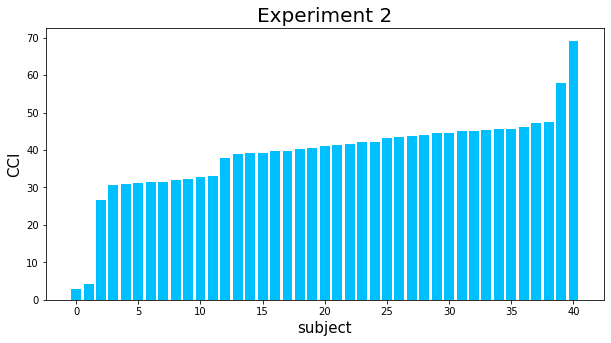

In [13]:
# Experiment 2

cuecon_sbj_vis = pd.DataFrame(columns=['sbj_id', 'cci'])

for sbj in subjects_vis: 
    
    df_sbj = df_vis[df_vis['sbj_id'] == sbj]
    
    cci_vis = compute_cci(df_sbj)
    
    case = pd.DataFrame({'sbj_id': [sbj], 'cci': [cci_vis]})
    cuecon_sbj_vis = pd.concat([cuecon_sbj_vis, case])

cci_sorted_vis = list(cuecon_sbj_vis['cci'].sort_values())

print('Mean CCI:', cuecon_sbj_vis['cci'].mean())
print('Min CCI: ', min(cci_sorted_vis))
print('Max CCI: ', max(cci_sorted_vis))



plt.figure(figsize=(10,5))

for index, value in enumerate(cci_sorted_vis): 
    plt.bar(index, value, color='deepskyblue')
    
plt.xlabel('subject',fontsize=15)
plt.xticks(None)
plt.ylabel('CCI',fontsize=15)
plt.title('Experiment 2',fontsize=20)

<ipython-input-11-efbf0ee6bb83>:11: RuntimeWarning: invalid value encountered in longlong_scalars
  perc_corr_cc = df_cc['correct'].sum() / df_cc['correct'].shape[0] * 100
<ipython-input-11-efbf0ee6bb83>:12: RuntimeWarning: invalid value encountered in longlong_scalars
  perc_corr_ci = df_ci['correct'].sum() / df_ci['correct'].shape[0] * 100
<ipython-input-11-efbf0ee6bb83>:11: RuntimeWarning: invalid value encountered in longlong_scalars
  perc_corr_cc = df_cc['correct'].sum() / df_cc['correct'].shape[0] * 100
<ipython-input-11-efbf0ee6bb83>:12: RuntimeWarning: invalid value encountered in longlong_scalars
  perc_corr_ci = df_ci['correct'].sum() / df_ci['correct'].shape[0] * 100
<ipython-input-11-efbf0ee6bb83>:11: RuntimeWarning: invalid value encountered in longlong_scalars
  perc_corr_cc = df_cc['correct'].sum() / df_cc['correct'].shape[0] * 100
<ipython-input-11-efbf0ee6bb83>:12: RuntimeWarning: invalid value encountered in longlong_scalars
  perc_corr_ci = df_ci['correct'].sum() / 

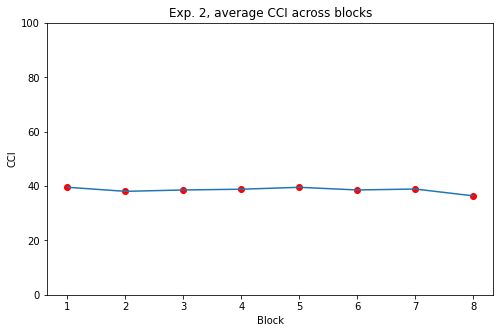

In [14]:
# block wise CCI Exp 1. 
blocks = list(df_vis['Block'].unique())
congr = pd.DataFrame(columns = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])

for sbj in subjects_vis: 
    
    df_sbj = df_vis[df_vis['sbj_id']==sbj]
    
    for block in blocks: 
        df_block = df_sbj[df_sbj['Block']==block]
        
        cci_block = compute_cci(df_block)
        
        congr.at[sbj, block] = cci_block


means = dict()
for block in blocks: 
    means[block] = congr[block].mean()
    
removed = means.pop(0)
    
    
plt.figure(figsize=(8,5))
plt.title('Exp. 2, average CCI across blocks')
plt.ylim(0,100)
plt.xlabel('Block')
plt.ylabel('CCI')
plt.plot(means.keys(),means.values())
plt.scatter(means.keys(), means.values(), color='red')
    